In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv(r"C:\Users\nice\Desktop\sales-forecasting-project (1)\sales-forecasting-project\data\processed\final_data.csv")

In [3]:
df

,Date,Inventory Level,Units Sold,Demand Forecast,Holiday/Promotion,Seasonality,Sales,month,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30
0,2022-01-02,416,163,171.60,0,Winter,3209.14,1,117.000000,73.952688,120.166667,89.490159
1,2022-01-02,248,116,133.92,0,Winter,5743.96,1,97.857143,45.754521,123.733333,87.004532
2,2022-01-02,238,200,204.30,1,Winter,4737.00,1,124.857143,41.526813,128.533333,87.111001
3,2022-01-02,471,58,51.57,1,Winter,2758.48,1,117.857143,48.571008,128.366667,87.245387
4,2022-01-02,178,56,60.30,1,Winter,952.60,1,110.714286,53.980596,124.200000,87.629077
...,...,...,...,...,...,...,...,...,...,...,...,...
67905,2024-01-01,96,8,18.46,0,Winter,569.84,1,187.714286,103.018953,127.866667,91.353702
67906,2024-01-01,313,51,48.43,0,Winter,4201.07,1,164.857143,114.140890,129.366667,89.637001
67907,2024-01-01,278,36,39.65,0,Winter,389.96,1,143.714286,123.340605,126.833333,91.204992
67908,2024-01-01,374,264,270.52,0,Winter,14008.96,1,164.142857,130.581301,129.133333,93.815936


In [4]:
df.drop('Demand Forecast',axis=1)

,Date,Inventory Level,Units Sold,Holiday/Promotion,Seasonality,Sales,month,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30
0,2022-01-02,416,163,0,Winter,3209.14,1,117.000000,73.952688,120.166667,89.490159
1,2022-01-02,248,116,0,Winter,5743.96,1,97.857143,45.754521,123.733333,87.004532
2,2022-01-02,238,200,1,Winter,4737.00,1,124.857143,41.526813,128.533333,87.111001
3,2022-01-02,471,58,1,Winter,2758.48,1,117.857143,48.571008,128.366667,87.245387
4,2022-01-02,178,56,1,Winter,952.60,1,110.714286,53.980596,124.200000,87.629077
...,...,...,...,...,...,...,...,...,...,...,...
67905,2024-01-01,96,8,0,Winter,569.84,1,187.714286,103.018953,127.866667,91.353702
67906,2024-01-01,313,51,0,Winter,4201.07,1,164.857143,114.140890,129.366667,89.637001
67907,2024-01-01,278,36,0,Winter,389.96,1,143.714286,123.340605,126.833333,91.204992
67908,2024-01-01,374,264,0,Winter,14008.96,1,164.142857,130.581301,129.133333,93.815936


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df.drop("Date",axis=1)

,Inventory Level,Units Sold,Demand Forecast,Holiday/Promotion,Seasonality,Sales,month,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30
0,416,163,171.60,0,Winter,3209.14,1,117.000000,73.952688,120.166667,89.490159
1,248,116,133.92,0,Winter,5743.96,1,97.857143,45.754521,123.733333,87.004532
2,238,200,204.30,1,Winter,4737.00,1,124.857143,41.526813,128.533333,87.111001
3,471,58,51.57,1,Winter,2758.48,1,117.857143,48.571008,128.366667,87.245387
4,178,56,60.30,1,Winter,952.60,1,110.714286,53.980596,124.200000,87.629077
...,...,...,...,...,...,...,...,...,...,...,...
67905,96,8,18.46,0,Winter,569.84,1,187.714286,103.018953,127.866667,91.353702
67906,313,51,48.43,0,Winter,4201.07,1,164.857143,114.140890,129.366667,89.637001
67907,278,36,39.65,0,Winter,389.96,1,143.714286,123.340605,126.833333,91.204992
67908,374,264,270.52,0,Winter,14008.96,1,164.142857,130.581301,129.133333,93.815936


In [7]:
target = 'Units Sold'
x = df.drop(columns=["Units Sold", "Sales"])
y = df[target]

In [8]:
df

,Date,Inventory Level,Units Sold,Demand Forecast,Holiday/Promotion,Seasonality,Sales,month,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30
0,2022-01-02,416,163,171.60,0,Winter,3209.14,1,117.000000,73.952688,120.166667,89.490159
1,2022-01-02,248,116,133.92,0,Winter,5743.96,1,97.857143,45.754521,123.733333,87.004532
2,2022-01-02,238,200,204.30,1,Winter,4737.00,1,124.857143,41.526813,128.533333,87.111001
3,2022-01-02,471,58,51.57,1,Winter,2758.48,1,117.857143,48.571008,128.366667,87.245387
4,2022-01-02,178,56,60.30,1,Winter,952.60,1,110.714286,53.980596,124.200000,87.629077
...,...,...,...,...,...,...,...,...,...,...,...,...
67905,2024-01-01,96,8,18.46,0,Winter,569.84,1,187.714286,103.018953,127.866667,91.353702
67906,2024-01-01,313,51,48.43,0,Winter,4201.07,1,164.857143,114.140890,129.366667,89.637001
67907,2024-01-01,278,36,39.65,0,Winter,389.96,1,143.714286,123.340605,126.833333,91.204992
67908,2024-01-01,374,264,270.52,0,Winter,14008.96,1,164.142857,130.581301,129.133333,93.815936


In [9]:
numerical_features = x.select_dtypes(include='number').columns.tolist()
categorical_features = x.select_dtypes(include='object').columns.tolist()

In [10]:
numerical_features

['Inventory Level',
 'Demand Forecast',
 'Holiday/Promotion',
 'month',
 'Rolling_Mean_7',
 'Rolling_Std_7',
 'Rolling_Mean_30',
 'Rolling_Std_30']

In [11]:
categorical_features

['Date', 'Seasonality']

In [12]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop='first'), categorical_features)
])


In [13]:
pipeline = Pipeline([
    ("preprocesser", preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100,random_state=42))
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
pipeline.fit(x_train, y_train)

In [ ]:
y_pred = pipeline.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [ ]:
print("RandomForest Results:")
print("MAE:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test, y_pred))
print("RMSE:",rmse)

RandomForest Results:
MAE: 7.361825209836549
R2 Score: 0.9917149630789753
RMSE: 8.661517487925463


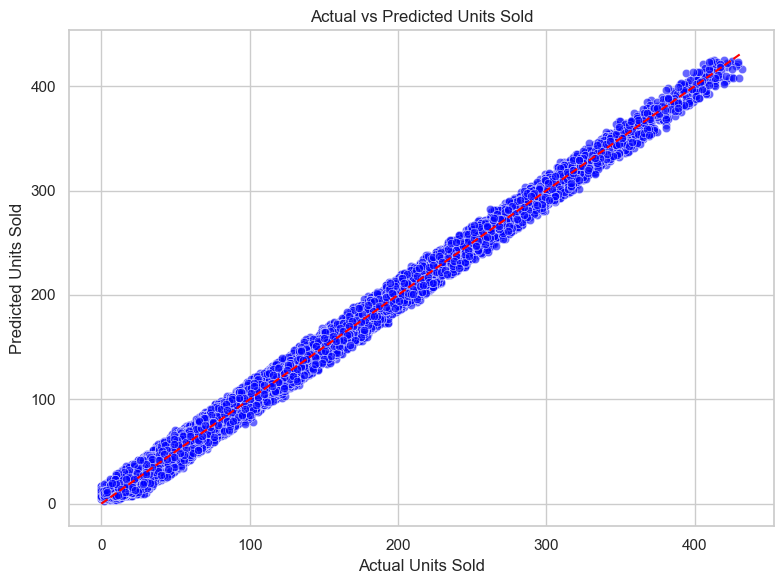

In [ ]:

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line

# Add labels and title
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Units Sold")
plt.tight_layout()
plt.show()

In [ ]:
# ...existing code...
import mlflow
import mlflow.sklearn
from mlflow import MlflowClient

# Set experiment name (optional)

mlflow.set_experiment("sales-forecasting-rf")

client = MlflowClient()

model_name = "SimpleRandomForestModel"
alias_name = "prod" 


with mlflow.start_run(run_name=f"Run for @{alias_name}"):

    # Log parameters
    mlflow.log_param("model_type", "RandomForestRegressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("test_size", 0.2)

    # ...inside your mlflow.start_run() block...

    mlflow.log_param("numerical_features", numerical_features)
    mlflow.log_param("categorical_features", categorical_features)
    mlflow.log_param("scaler", "StandardScaler")
    mlflow.log_param("encoder", "OneHotEncoder(drop='first')")
    
    # Fit model
    pipeline.fit(x_train, y_train)
    
    # Predict and calculate metrics
    y_pred = pipeline.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Log metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    
    # Log model
    mlflow.sklearn.log_model(pipeline, "model")
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')

2025/05/15 20:33:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Mean Squared Error: 75.02188519363864
R2 Score: 0.9917149630789753
